In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_excel('data.xlsx', sheet_name='Assignment-1')

In [9]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [10]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


# Exploratory Data Analysis

In [22]:
# calculating the null values in then 
df.isna().sum()

Date                      0
product                   0
phase                     0
campaign_platform         0
campaign_type             0
communication_medium      0
subchannel                0
audience_type             0
creative_type             0
creative_name             0
device                    0
age                       0
spends                    0
impressions               0
clicks                    0
link_clicks             546
dtype: int64

In [26]:
# caluclating null value percentage in the link_clicks column
df.link_clicks.isna().sum() * 100 /df.link_clicks.count()

3.3521611001964637

In [44]:
# calculating value counts for each column
for col in df.columns:
    print(col + "-" + str(df[col].value_counts().count()))

Date-257
product-1
phase-1
campaign_platform-2
campaign_type-2
communication_medium-2
subchannel-4
audience_type-4
creative_type-3
creative_name-4
device-4
age-7
spends-9087
impressions-1188
clicks-263
link_clicks-160


In [49]:
df['campaign_platform'].value_counts()

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

In [50]:
df['campaign_type'].value_counts()

Search         15101
Conversions     1733
Name: campaign_type, dtype: int64

In [51]:
df['communication_medium'].value_counts()

Search Keywords    15101
Creative            1733
Name: communication_medium, dtype: int64

In [53]:
df['subchannel'].value_counts()

Brand           7853
Generic         4544
Competitor      2704
Facebook Ads    1733
Name: subchannel, dtype: int64

In [54]:
df['audience_type'].value_counts()

'-            15101
Audience 1      813
Audience 2      738
Audience 3      182
Name: audience_type, dtype: int64

In [55]:
df['creative_type'].value_counts()

'-          15101
Image        1130
Carousal      603
Name: creative_type, dtype: int64

In [56]:
df['creative_name'].value_counts()

'-          15101
Click         644
Carousal      603
Girl          486
Name: creative_name, dtype: int64

In [57]:
df['device'].value_counts()

Mobile     7357
Desktop    6318
device     1733
Tablet     1426
Name: device, dtype: int64

In [58]:
df['age'].value_counts()

25-34           3097
35-44           2865
Undetermined    2586
45-54           2499
18-24           2472
55-64           1757
65 or more      1558
Name: age, dtype: int64

In [65]:
df.dtypes

Date                    datetime64[ns]
product                         object
phase                           object
campaign_platform               object
campaign_type                   object
communication_medium            object
subchannel                      object
audience_type                   object
creative_type                   object
creative_name                   object
device                          object
age                             object
spends                         float64
impressions                      int64
clicks                           int64
link_clicks                    float64
dtype: object

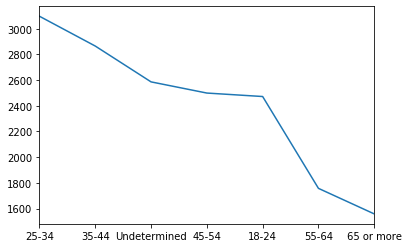

In [72]:
# plotting the age distribution
df['age'].value_counts().plot();

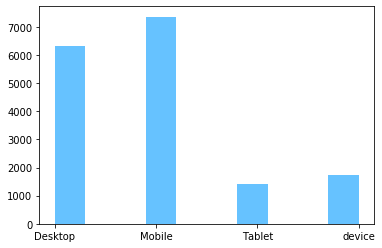

In [73]:
# plotting the device counts in the data
plt.hist(data=df, x='device',color = '#66c2ff');

In [92]:
df[df['campaign_platform'] == 'Google Ads'][['audience_type', 'creative_type', 'creative_name']].nunique

<bound method DataFrame.nunique of       audience_type creative_type creative_name
0                '-            '-            '-
1                '-            '-            '-
2                '-            '-            '-
3                '-            '-            '-
4                '-            '-            '-
...             ...           ...           ...
16829            '-            '-            '-
16830            '-            '-            '-
16831            '-            '-            '-
16832            '-            '-            '-
16833            '-            '-            '-

[15101 rows x 3 columns]>

In [96]:
df[df['campaign_platform'] == 'Facebook Ads']['subchannel'].value_counts()

Facebook Ads    1733
Name: subchannel, dtype: int64

In [100]:
df[df['campaign_platform'] == 'Facebook Ads']['communication_medium'].value_counts()

Creative    1733
Name: communication_medium, dtype: int64

In [104]:
df[df['campaign_platform'] == 'Facebook Ads']['campaign_type'].value_counts()

Conversions    1733
Name: campaign_type, dtype: int64